In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sb
%matplotlib inline
sb.set_style("whitegrid")

In [4]:
from sklearn import tree

In [5]:
X = [[0, 0], [1, 2]]
Y = [0, 1]

In [6]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,Y)
clf.predict([[2, 2]])

array([1])

Let us use this in Iris dataset

In [7]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()

In [8]:
iris.data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
X = iris.data[:, 2:]

In [11]:
Y = iris.target

In [12]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
clf = tree.DecisionTreeClassifier(random_state=42)
clf = clf.fit(X, Y)

for graph visualization  library import write conda install graphviz python-graphviz

In [14]:
from sklearn.tree import export_graphviz
export_graphviz(clf, out_file="tree.dot", feature_names=iris.feature_names[2:], class_names=iris.target_names, rounded=True, filled=True)

In command prompt need to write this in the same directory dot -Tpng tree.dot -o tree.png

In [15]:
#export_graphviz?
#type(clf)

In [16]:
%%HTML
<img src='tree_42.png' width=50%>

In [17]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file="tree.dot", feature_names=iris.feature_names[2:], class_names=iris.target_names, rounded=True, filled=True)

In [18]:
graph = graphviz.Source(dot_data)

Visualize Iris dataset decision boundary

In [19]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as pt 
%matplotlib inline
sb.set_style("whitegrid")

In [20]:
df = sb.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
col = ["petal_length", "petal_width"]
X = df.loc[:, col]

In [22]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [23]:
species_to_num = {'setosa':0, 'versicolor':1, 'virginica':2}
Y = df['species'].map(species_to_num)
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [24]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [25]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max()+1
y_min, y_max = Y.min(), Y.max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

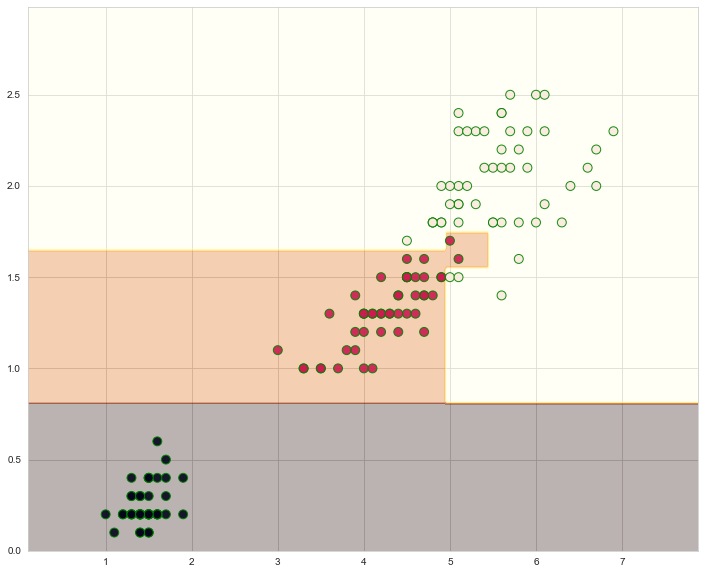

In [26]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = pt.figure(figsize=(12,10))
ax = pt.contourf(xx, yy, z, cmap='afmhot', alpha=0.3);
pt.scatter(X.values[:, 0], X.values[:, 1], c=Y, s=80, alpha=0.9, edgecolors='g')

In [27]:
pt.scatter?

Now test the decisiion tree regression system

In [31]:
from sklearn.tree import DecisionTreeRegressor
reg = tree.DecisionTreeRegressor(max_depth=2, min_samples_leaf=10)
reg.fit(X,Y)

DecisionTreeRegressor(max_depth=2, min_samples_leaf=10)